In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df = df.dropna(subset=['MasVnrArea'])

In [4]:
df = df.dropna(subset=['LotFrontage'])

In [5]:
X = df[[
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'BsmtFullBath', 'BsmtHalfBath',
    'FullBath', 'HalfBath'
]]

In [6]:
y = df['SalePrice']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LR()
model.fit(X_train, y_train)



LinearRegression()

In [9]:
y_train_pred  = model.predict(X_train)
y_test_pred = model.predict(X_test)

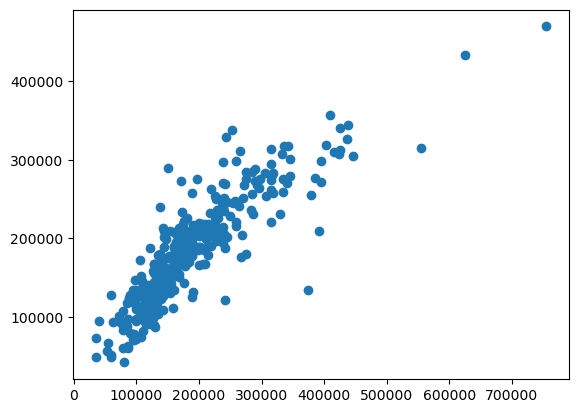

In [37]:
plt.scatter(y_test, y_test_pred)

In [10]:
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)

In [11]:
print(r2_score_train)
print(r2_score_test)

0.6779684490338416
0.7395837378303404


In [12]:
residual = y_test-y_test_pred
print(residual)

766    -11859.076699
292    -21250.653793
1329    -4721.810054
1360   -68900.534728
69      11963.520321
            ...     
388    -14037.839026
127     24113.901874
957       540.196941
65      36433.154111
625    -30429.050605
Name: SalePrice, Length: 359, dtype: float64


In [13]:
import seaborn as sns

C:\Users\kirti\AppData\Local\Temp\ipykernel_15232\1130942186.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, hist=True, kde=True)
C:\Users\kirti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

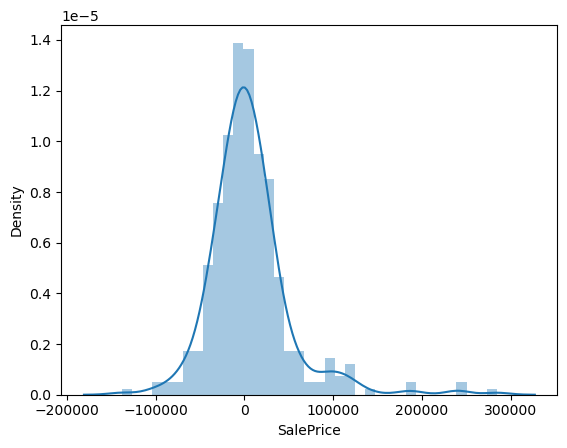

In [14]:
sns.distplot(residual, hist=True, kde=True)

In [15]:
param_grid = {'alpha': [0.1, 1, 10, 100]}

In [16]:
ridge = Ridge()

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='accuracy')

In [19]:
grid.fit(X_train, y_train)

C:\Users\kirti\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kirti\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kirti\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kirti\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='accuracy')

In [20]:
best_param = grid.best_params_

In [21]:
best_param

{'alpha': 0.1}

In [25]:
Ridge = Ridge(alpha=0.1)

In [27]:
modelss = Ridge.fit(X_train, y_train)

In [28]:
ridge_y_train_pred = modelss.predict(X_train)
ridge_y_test_pred = modelss.predict(X_test)

In [35]:
train_r2_score = r2_score(y_train, ridge_y_train_pred)
test_r2_score = r2_score(y_test, ridge_y_test_pred)


In [36]:
print(f'Ridge Training R² Score: {train_r2_score:.4f}')
print(f'Ridge Test R² Score: {test_r2_score:.4f}')

Ridge Training R² Score: 0.6780
Ridge Test R² Score: 0.7396
